In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette("Set1")
import numpy as np

In [2]:
stdsaltelli5kp1 = pd.read_csv("data/saltelli5000std-star1.csv")
stdsaltelli5kp2 = pd.read_csv("data/saltelli5000std-star2.csv")
stdsaltelli5kp3 = pd.read_csv("data/saltelli5000std-star3.csv")

sobolsets = [stdsaltelli5kp1 ,  stdsaltelli5kp2 , stdsaltelli5kp3 ]  


In [3]:
def rnmvarsetindx(dataset):
    dataset["Var"][0] = "N"
    dataset["Var"][1] = "n"
    dataset.set_index("Var", inplace = True)
    return(dataset)

listmap = lambda fn,data: list(map(fn,data))

listmap(rnmvarsetindx,sobolsets);

/home/marcelovmaciel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/marcelovmaciel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
stdsaltelli5kp3.head()

,S1,S1_conf,ST,ST_conf
Var,,,,
N,0.003547,0.006441,0.021785,0.004212
n,0.182873,0.025405,0.240052,0.016183
p,0.053821,0.013521,0.112203,0.008604
σ,0.513162,0.041745,0.616044,0.030817
ρ,0.093711,0.016003,0.178366,0.011720


In [5]:
listmap(lambda x: print(x.to_latex()),[stdsaltelli5kp1 , 
                        stdsaltelli5kp2 ,
                        stdsaltelli5kp3 ])

\begin{tabular}{lrrrr}
\toprule
{} &        S1 &   S1\_conf &        ST &   ST\_conf \\
Var      &           &           &           &           \\
\midrule
N        &  0.005239 &  0.006541 &  0.022070 &  0.002834 \\
n        &  0.187386 &  0.026708 &  0.234778 &  0.014641 \\
p        &  0.063925 &  0.013259 &  0.116300 &  0.009839 \\
σ        &  0.461952 &  0.029550 &  0.576792 &  0.030179 \\
ρ        &  0.129436 &  0.017952 &  0.240982 &  0.016418 \\
p\_intran &  0.000789 &  0.003783 &  0.011597 &  0.001665 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
{} &        S1 &   S1\_conf &        ST &   ST\_conf \\
Var      &           &           &           &           \\
\midrule
N        &  0.003789 &  0.006132 &  0.018755 &  0.003308 \\
n        &  0.189835 &  0.023522 &  0.257400 &  0.018546 \\
p        &  0.035737 &  0.011525 &  0.084640 &  0.007704 \\
σ        &  0.556095 &  0.040256 &  0.655125 &  0.033731 \\
ρ        &  0.067517 &  0.016010 &  0.154048 &  0.013454 \

[None, None, None]

In [6]:
stdsaltelli5kp1.head()

,S1,S1_conf,ST,ST_conf
Var,,,,
N,0.005239,0.006541,0.022070,0.002834
n,0.187386,0.026708,0.234778,0.014641
p,0.063925,0.013259,0.116300,0.009839
σ,0.461952,0.029550,0.576792,0.030179
ρ,0.129436,0.017952,0.240982,0.016418


In [7]:
def plot_sobol(data, imagename:str, imagetitle:str):
    indices_5000 = data[['S1','ST']]
    err_5000 = data[['S1_conf','ST_conf']]
    fig, ax = plt.subplots(1, dpi = 200)
    indices_5000.plot.bar(yerr=err_5000.values.T,ax=ax)
    plt.xticks(rotation = "horizontal",  fontsize = 14, 
               color = "gray", fontweight= "bold")
    ax.set_xlabel(" ")
    ax.set_title(imagetitle, fontsize = 18, 
                 color = "gray", fontweight= "bold")

    plt.savefig(imagename, dpi = 200)
    plt.show()

In [8]:
imagenames = ["img/sobolpstar1.png", "img/sobolpstar2.png", "img/sobolpstar3.png" ]
imagetitles = ["Sobol Indexes (p*)", "Sobol Indexes (p**)", "Sobol Indexes (p***)"]

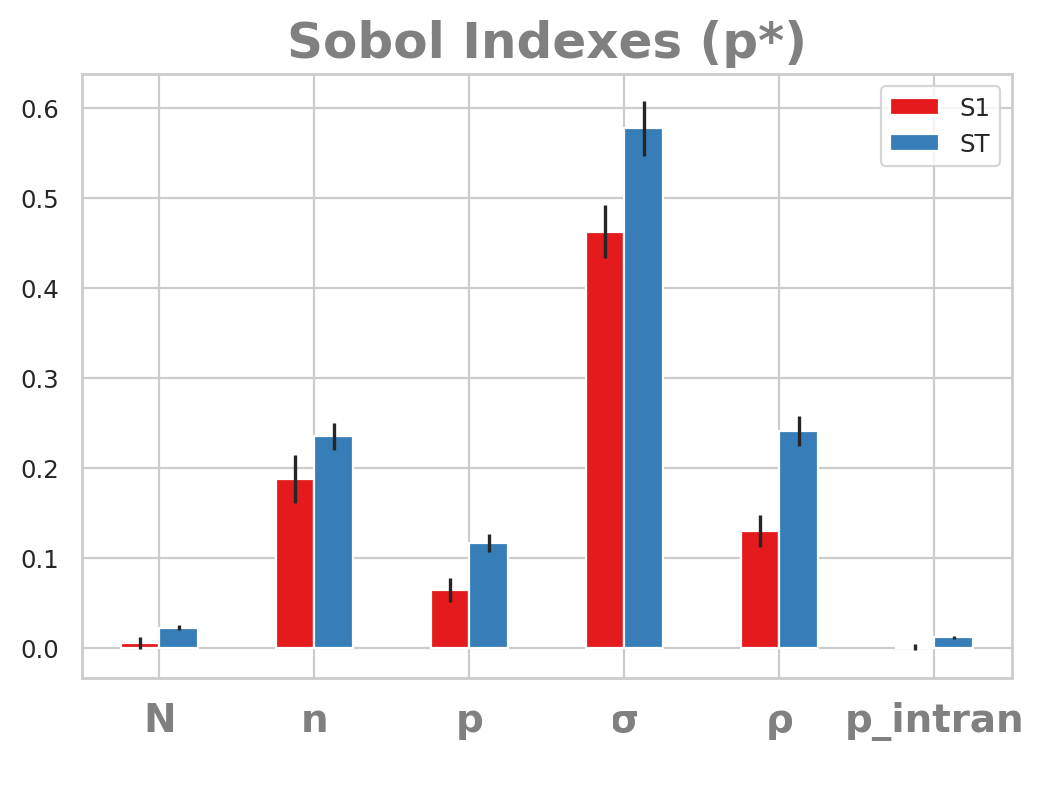

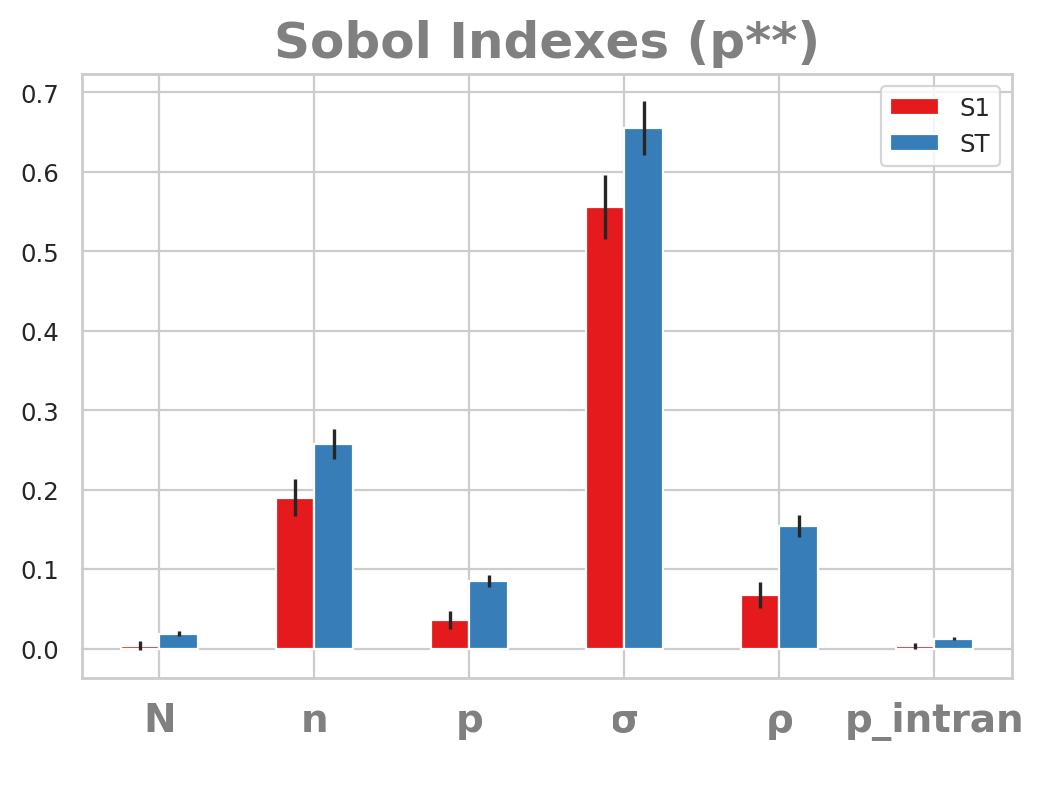

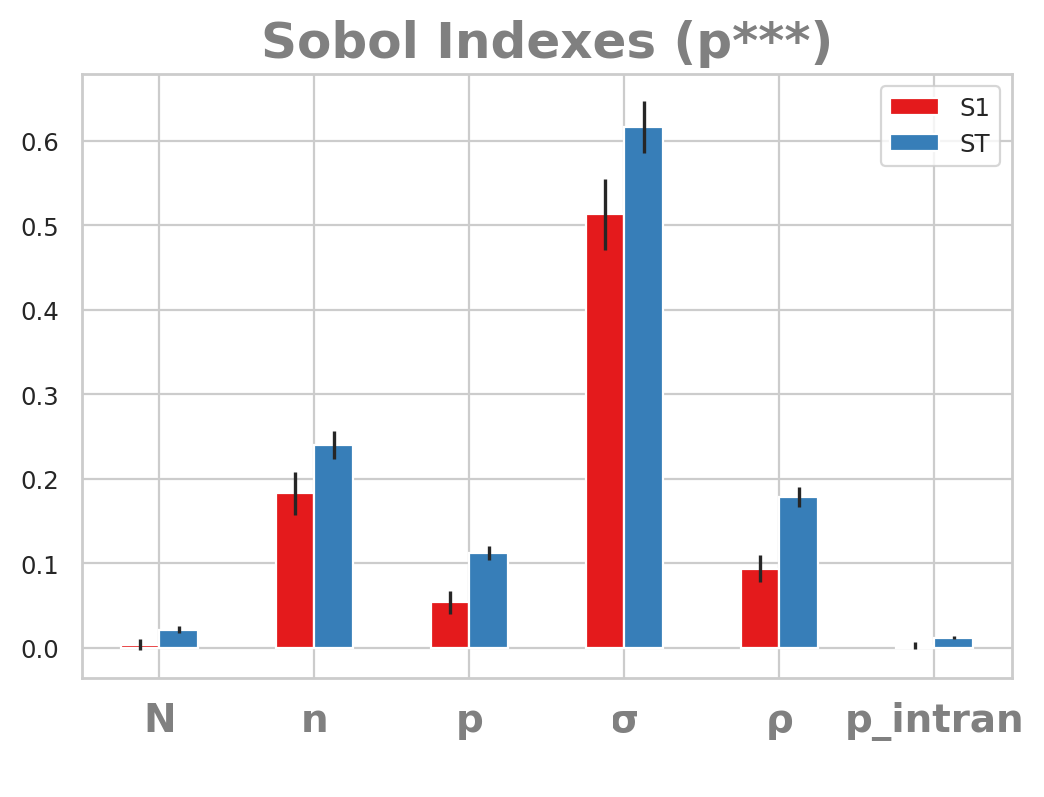

[None, None, None]

In [10]:
listmap(lambda x: plot_sobol(*x), zip(sobolsets,imagenames,imagetitles))

In [2]:
df_5k6params = pd.read_csv("data/5000paramsandresults.csv")

In [3]:
Y = df_5000["Ystd"]

In [4]:
df_5000

,N,n_issues,p,σ,ρ,p_intran,Ystd
0,1489,2,0.561514,0.341611,0.028027,0.272168,0.077328
1,707,2,0.561514,0.341611,0.028027,0.272168,0.079361
2,1489,9,0.561514,0.341611,0.028027,0.272168,0.029046
3,1489,2,0.545869,0.341611,0.028027,0.272168,0.087785
4,1489,2,0.561514,0.043975,0.028027,0.272168,0.186917
5,1489,2,0.561514,0.341611,0.008496,0.272168,0.071647
6,1489,2,0.561514,0.341611,0.028027,0.076465,0.062548
7,1489,9,0.545869,0.043975,0.008496,0.076465,0.124015
8,707,2,0.545869,0.043975,0.008496,0.076465,0.193948
9,707,9,0.561514,0.043975,0.008496,0.076465,0.096653


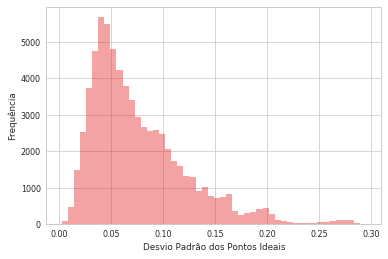

In [12]:
sns.distplot(Y, kde = False)
plt.ylabel("Frequência")
plt.xlabel("Desvio Padrão dos Pontos Ideais")
plt.savefig("image/distY.png", dpi = 200)
plt.show()


In [2]:
initcondf = pd.read_csv("data/saltelli70kinitcond.csv")

In [3]:
initcondf

,std,nips
0,0.233179,1489
1,0.232485,707
2,0.233333,1489
3,0.236314,1489
4,0.228884,1489
5,0.229952,1489
6,0.231978,1489
7,0.231796,1489
8,0.234783,707
9,0.223897,707


In [6]:
initcondf["std"]

0        0.233179
1        0.232485
2        0.233333
3        0.236314
4        0.228884
5        0.229952
6        0.231978
7        0.231796
8        0.234783
9        0.223897
10       0.231957
11       0.233110
12       0.241199
13       0.226710
14       0.231422
15       0.230696
16       0.232008
17       0.229356
18       0.231983
19       0.230988
20       0.230420
21       0.228648
22       0.228978
23       0.232572
24       0.232498
25       0.231588
26       0.230047
27       0.230580
28       0.232757
29       0.231492
           ...   
69970    0.230109
69971    0.229947
69972    0.231944
69973    0.231712
69974    0.232884
69975    0.231381
69976    0.231797
69977    0.230109
69978    0.231778
69979    0.232563
69980    0.232157
69981    0.227930
69982    0.230753
69983    0.229761
69984    0.235558
69985    0.233557
69986    0.232314
69987    0.230752
69988    0.229572
69989    0.228156
69990    0.231996
69991    0.228438
69992    0.229904
69993    0.232375
69994    0

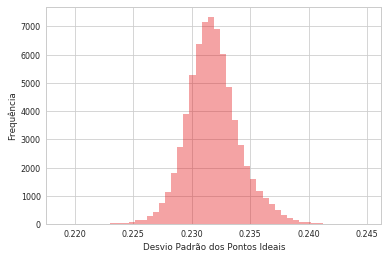

In [7]:
sns.distplot(initcondf["std"], kde = False)
plt.ylabel("Frequência")
plt.xlabel("Desvio Padrão dos Pontos Ideais")
plt.savefig("image/diststdinit.png", dpi = 200)
plt.show()


In [15]:
"""
g = sns.PairGrid(mutodf, y_vars=["Ystd"], x_vars=["N", "n_issues", "p", "σ", "ρ"])
g.map(sns.regplot, color='k',scatter_kws={'alpha':0.2, 's':4, 'color':'gray'})
#plt.suptitle("Regressão")
#plt.subplots_adjust(top=0.85)
g.savefig("image/regressionplot.png", dpi = 300)
"""


'\ng = sns.PairGrid(mutodf, y_vars=["Ystd"], x_vars=["N", "n_issues", "p", "σ", "ρ"])\ng.map(sns.regplot, color=\'k\',scatter_kws={\'alpha\':0.2, \'s\':4, \'color\':\'gray\'})\n#plt.suptitle("Regressão")\n#plt.subplots_adjust(top=0.85)\ng.savefig("image/regressionplot.png", dpi = 300)\n'

In [13]:
def saveregressionplot(df,xvar,yvar = "Ystd", typesim = "mutatingo"):

    fig1, ax1 = plt.subplots(1, dpi = 200)
    sns.regplot(xvar, yvar, data = df, scatter_kws={'alpha':0.2, 's':4, 'color':'gray'}, color='k')
    ax1.set_xlabel(xvar,  fontsize = 12, color = "gray", fontweight= "bold")
    ax1.set_ylabel(yvar,  fontsize = 12, color = "gray", fontweight= "bold")
    plt.savefig("image/regression{}{}.png".format(typesim,xvar), dpi = 200)
    

In [14]:
for i in list(df_5000.columns.values):
    saveregressionplot(df_5000,i)

In [10]:
list(df_5000.columns.values)

['N', 'n_issues', 'p', 'σ', 'ρ', 'p_intran', 'Ystd']

In [7]:
df_5000.columns.values[3]

'σ'

In [11]:
def savenlregplot(df,xvar,yvar = "Ystd", typesim = "mutatingo"):

    fig1, ax1 = plt.subplots(1, dpi = 200)
    sns.regplot(xvar, yvar, data = df, scatter_kws={'alpha':0.2, 's':4, 'color':'gray'}, color='k', order = 3 )
    ax1.set_xlabel(xvar,  fontsize = 12, color = "gray", fontweight= "bold")
    ax1.set_ylabel(yvar,  fontsize = 12, color = "gray", fontweight= "bold")
    plt.savefig("image/nlregression{}{}.png".format(typesim,xvar), dpi = 200)

In [13]:
for i in list(df_5000.columns.values):
    savenlregplot(df_5000,i)